**Description:-** In this machine learning project, we will start by analyzing the **train, meal_info and fulfilment_center_info** datasets to understand the relationship between all the Independent variables with our Dependent variable, **num_orders** (num of orders). Finally we will be building a **linear regression model** that would help us predict num of orders for **test** dataset.

In [1]:
# Importing the libraries:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading all the 4 datasets:
train = pd.read_csv("train_data.csv")
meal = pd.read_csv("meal_info.csv")
fulfilment = pd.read_csv("fulfilment_center_info.csv")
test = pd.read_csv("test_data.csv")

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
fulfilment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
train.shape, meal.shape, fulfilment.shape, test.shape

((456548, 9), (51, 3), (77, 5), (32573, 8))

**Column Info:**

For train dataset:-

* **id** : Unique ID
* **week** : Week No.
* **center_id** : Unique ID for fulfillment center
* **meal_id** : Unique ID for Meal
* **checkout_price** : Final price including discount, taxes & delivery charges
* **base_price** : Base price of the meal
* **emailer_for_promotion** : Emailer sent for promotion of meal
* **homepage_featured** : Meal featured at homepage
* **num_orders** : (Target) Orders Count

For meal_info dataset:-

* **meal_id** : Unique ID for the meal
* **category** : Type of meal (beverages/snacks/soups….)
* **cuisine** : Meal cuisine (Indian/Italian/…)

For fulfilment_center_info dataset:-

* **center_id** : Unique ID for fulfillment center
* **city_code** : Unique code for city
* **region_code** : Unique code for region
* **center_type** : Anonymized center type
* **op_area** : Area of operation (in km^2)

In [8]:
# Merging data to create a single training dataset.

In [9]:
merge_data = pd.merge(train, meal, on = 'meal_id', how = 'inner')

In [10]:
merge_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai


In [11]:
merge_data.shape

(456548, 11)

In [12]:
merge_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
dtype: int64

In [13]:
final_merge = pd.merge(merge_data, fulfilment, on = 'center_id', how = 'inner')

In [14]:
final_merge.shape

(456548, 15)

In [15]:
train_df = final_merge.copy()

In [16]:
# Training dataset after the merge:
train_df.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0


In [17]:
train_df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [18]:
# Performing the same merging steps for test dataset:
merge_test = pd.merge(test, meal, on = 'meal_id', how = 'inner')

In [19]:
final_test = pd.merge(merge_test, fulfilment, on = 'center_id', how = 'inner')

In [20]:
final_test.isnull().sum().sum()

0

In [21]:
test_df = final_test.copy()

In [22]:
# Test dataset after the merge:
test_df.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

'num_orders' is our dependent variable.

In [24]:
train_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [25]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,456548.0,1.250096e+06,144354.822378,1000000.00,1124998.75,1250183.50,1375140.25,1499999.00
week,456548.0,7.476877e+01,41.524956,1.00,39.00,76.00,111.00,145.00
center_id,456548.0,8.210580e+01,45.975046,10.00,43.00,76.00,110.00,186.00
meal_id,456548.0,2.024337e+03,547.420920,1062.00,1558.00,1993.00,2539.00,2956.00
checkout_price,456548.0,3.322389e+02,152.939723,2.97,228.95,296.82,445.23,866.27
base_price,456548.0,3.541566e+02,160.715914,55.35,243.50,310.46,458.87,866.27
emailer_for_promotion,456548.0,8.115247e-02,0.273069,0.00,0.00,0.00,0.00,1.00
homepage_featured,456548.0,1.091999e-01,0.311890,0.00,0.00,0.00,0.00,1.00
num_orders,456548.0,2.618728e+02,395.922798,13.00,54.00,136.00,324.00,24299.00
city_code,456548.0,6.015534e+02,66.195914,456.00,553.00,596.00,651.00,713.00


### Univariate Analysis:

In [26]:
train_df["week"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145], dtype=int64)

In [27]:
train_df["week"].nunique()

145

The dataset contains historical demand data for 145 weeks.

<AxesSubplot:xlabel='checkout_price', ylabel='Density'>

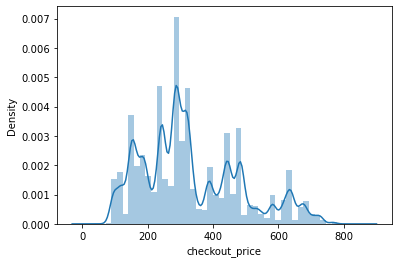

In [28]:
sns.distplot(train_df['checkout_price'])

In [29]:
print('Skewness : ',train_df["checkout_price"].skew())
print('Kurtosis : ',train_df['checkout_price'].kurtosis())

Skewness :  0.6723299047159774
Kurtosis :  -0.252819487196537


**Ways to interpret Skewness and Kurtosis values:**
  
For Skewness:

If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer. If the skewness is exactly zero (which is unreal in real world problem) the distribution is perfectly symmetrical.

Some classic rule of thumb while interpreting skewness value:-

* If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.

* If skewness is between −1 and −½ or between +½ and +1, the distribution can be called moderately skewed.

* If skewness is between −½ and +½, the distribution can be called approximately symmetric.

For Kurtosis:

* If the Kurtosis value of the distribution is greater than 3, then the distribution represents a Leptokurtic curve.

* If the Kurtosis value is less than 3, then the distribution represents a Platykurtic curve.

* If the Kurtosis value is 3, then the distribution represents a Mesokurtic curve.

So, in our case the skewness value of 'checkout price' is 0.67 which suggests that the distribution is moderately positively skewed.
And the Kurtosis value is -0.25 which is less than 3, suggesting a Platykurtic curve.

<AxesSubplot:ylabel='Density'>

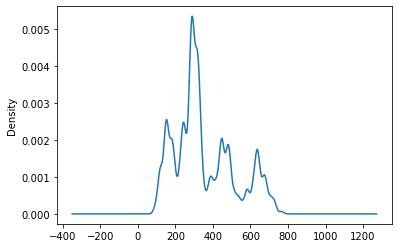

In [30]:
train_df["base_price"].plot(kind = 'kde')

base_price has a multi-model distribution.

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='count'>

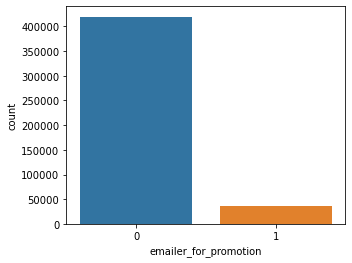

In [31]:
plt.figure(figsize = (5,4))
sns.countplot(train_df['emailer_for_promotion'])

<AxesSubplot:xlabel='homepage_featured', ylabel='count'>

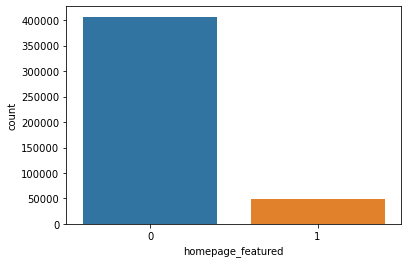

In [32]:
sns.countplot(train_df['homepage_featured'])

Text(0.5, 0, 'num of orders')

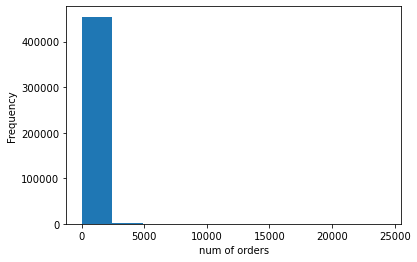

In [33]:
train_df['num_orders'].plot(kind = 'hist')
plt.xlabel("num of orders")

In [34]:
train_df['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

<AxesSubplot:xlabel='num_orders'>

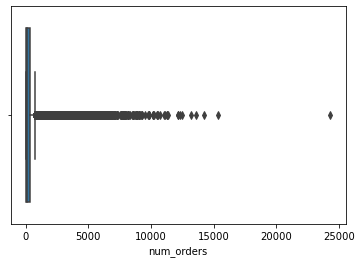

In [35]:
sns.boxplot(train_df["num_orders"])

We have some outliers in our dataset. In the next step we will handle this outliers by removing any number of orders greater than 15000.

In [36]:
train_df[train_df["num_orders"] > 15000]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
391413,1452474,5,43,2290,159.08,311.43,1,1,24299,Rice Bowl,Indian,590,56,TYPE_A,5.1
391415,1300512,7,43,2290,159.08,311.43,1,1,15336,Rice Bowl,Indian,590,56,TYPE_A,5.1


In [37]:
new_df = train_df[train_df["num_orders"] <= 15000]

In [38]:
new_df.shape

(456546, 15)

### Bivariate Analysis:

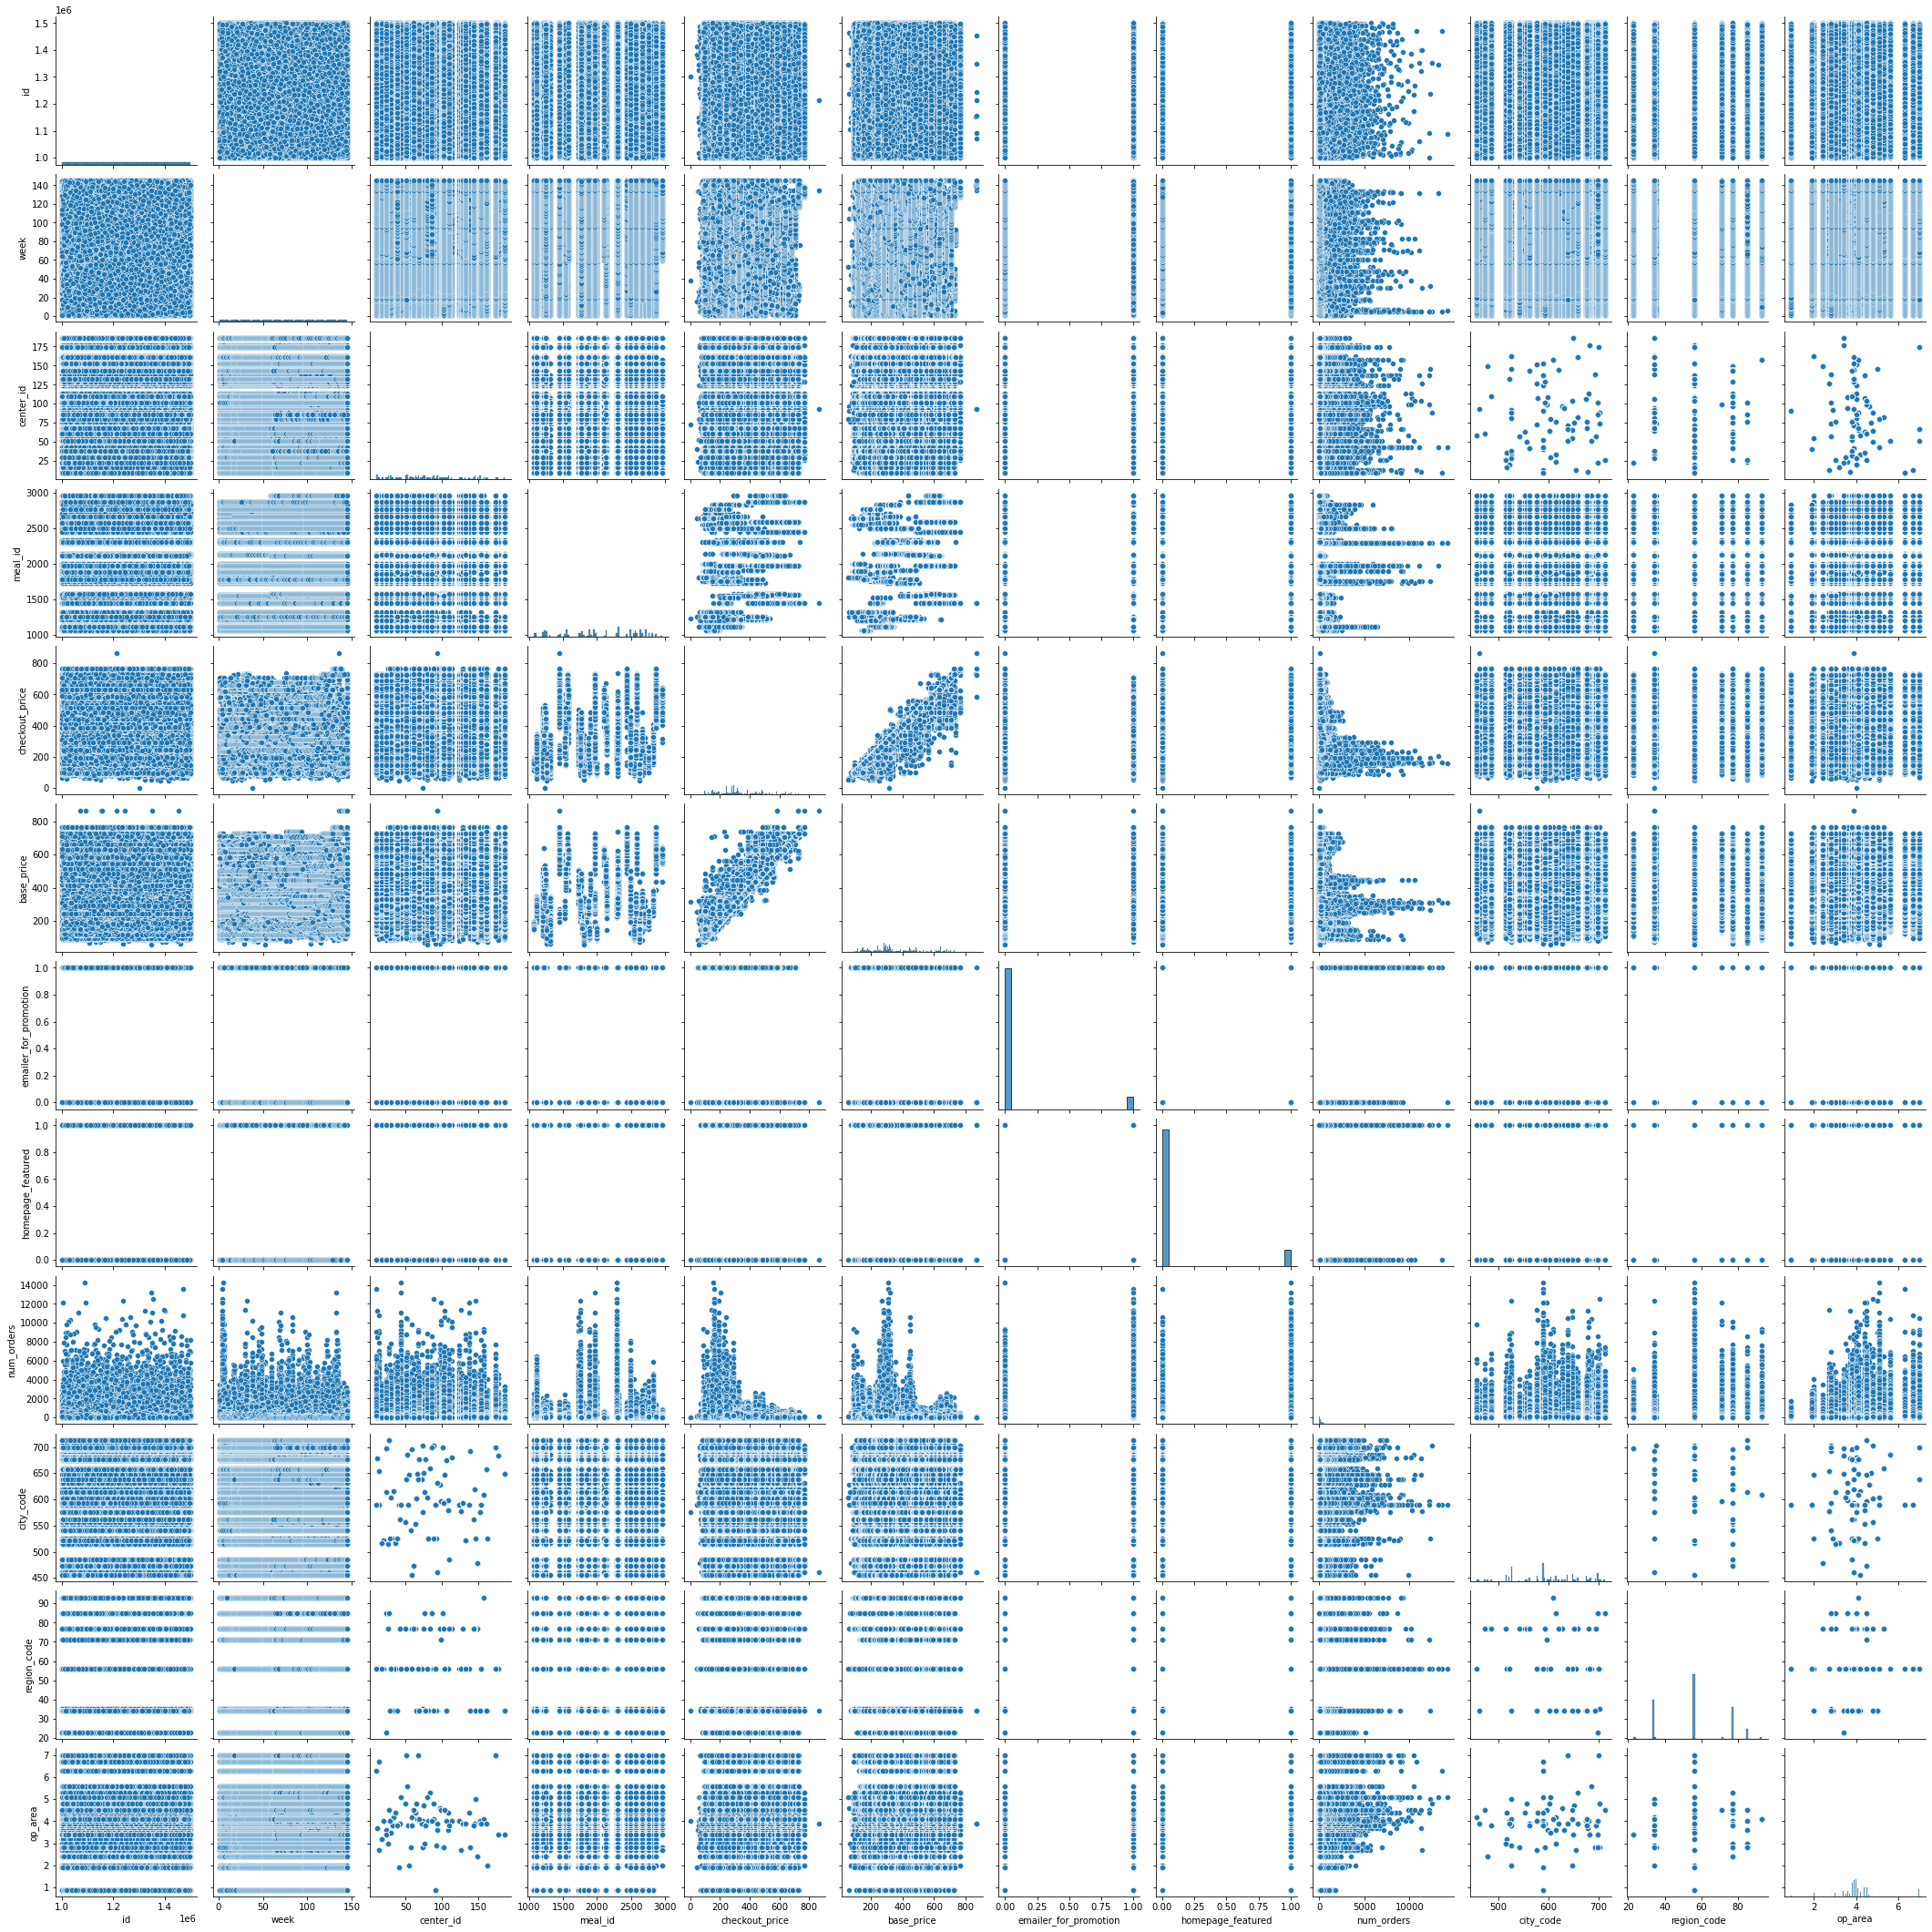

In [39]:
sns.pairplot(new_df)

<AxesSubplot:>

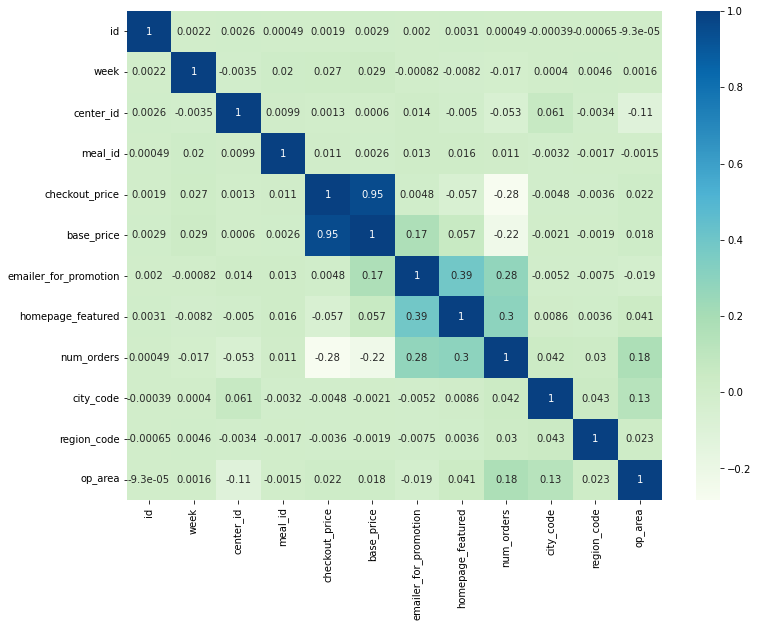

In [40]:
plt.figure(figsize = (12,9))
sns.heatmap(new_df.corr(), annot = True, cmap = 'GnBu')

In [41]:
# Performing One-Hot Encoding on Categorical columns of training data:
data = pd.get_dummies(new_df[["category", "cuisine", "center_type"]], drop_first=True)

In [42]:
data.head()

,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [43]:
final_train_df = pd.concat([new_df, data], axis = 1)

In [44]:
final_train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,...,0,0,0,0,0,0,0,1,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,...,0,0,0,0,0,0,0,1,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,...,0,0,0,0,0,0,0,1,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,...,0,0,0,0,0,0,0,1,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,...,0,0,0,0,0,0,0,1,0,1


In [45]:
final_train_df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'category_Biryani', 'category_Desert', 'category_Extras',
       'category_Fish', 'category_Other Snacks', 'category_Pasta',
       'category_Pizza', 'category_Rice Bowl', 'category_Salad',
       'category_Sandwich', 'category_Seafood', 'category_Soup',
       'category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'cuisine_Thai', 'center_type_TYPE_B', 'center_type_TYPE_C'],
      dtype='object')

In [46]:
final_train_df = final_train_df.drop(["id","cuisine", "category","center_type"], axis = 1)

In [47]:
X_train = final_train_df.drop('num_orders', axis = 1)
y_train = final_train_df["num_orders"]

In [48]:
# Performing One-hot encoding on categorical columns of test data:
data2 = pd.get_dummies(test_df[["category", "cuisine", "center_type"]], drop_first=True)

In [49]:
final_test_df = pd.concat([test_df, data2], axis = 1)

In [50]:
final_test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,...,0,0,0,0,0,0,0,1,0,1
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,...,0,0,0,0,0,0,0,1,0,1
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,...,0,0,0,0,0,0,0,1,0,1
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,...,0,0,0,0,0,0,0,1,0,1
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,...,0,0,0,0,0,0,0,1,0,1


In [51]:
final_test_df = final_test_df.drop(["id","cuisine", "category","center_type"], axis = 1)

In [52]:
X_test = final_test_df.copy()

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
print(lin_reg.coef_)

[-1.18190029e-01 -3.73884313e-01  1.12064860e-02 -6.52904894e-01
  1.91503154e-01  2.56605125e+02  2.38497283e+02  1.43568491e-01
  6.44655541e-01  6.54930096e+01  9.09403155e+01  8.66760442e+01
 -2.09037849e+02  1.25658955e+01 -3.27772626e+02 -3.14826157e+02
  5.62700423e+01  5.99596384e+02 -8.79166001e+00  1.12962812e+02
 -2.18438760e+01 -4.17556199e+02 -3.09177712e+02 -1.71687734e+02
  1.88220362e+02  2.51543397e+02  1.33850196e+01 -2.47960349e+01]


In [57]:
print(lin_reg.intercept_)

-66.28778939767744


In [58]:
prediction = lin_reg.predict(X_test)

In [59]:
print(prediction)

[330.97923462 330.2081397  331.07222423 ...  51.23797364  51.11978361
  50.61350497]


In [60]:
# Score on Training dataset:
lin_reg.score(X_train, y_train)

0.4143450383840205

In [61]:
pred = pd.Series(prediction)

In [70]:
pred.head()

0    330.979235
1    330.208140
2    331.072224
3    329.456721
4    329.082475
dtype: float64

In [68]:
df = pd.concat([final_test_df, pred], axis = 1)
df.rename(columns = {0 : 'Prediction'}, inplace = True)

In [69]:
# Final look of the test dataset with the predicted value from the model:
df.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,Prediction
0,146,55,1885,158.11,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,1,330.979235
1,147,55,1885,159.11,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,1,330.208140
2,149,55,1885,157.14,158.14,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,1,331.072224
3,150,55,1885,159.14,157.14,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,1,329.456721
4,151,55,1885,160.11,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,1,0,1,329.082475


### That's It!!